In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
from sklearn import datasets
from sklearn.metrics import accuracy_score

<font size="3"> $ z_{i} = y_{i}*f(x_{i}) = y_{i}(w^{T}x_{i}+b)$</font>

<font size="4">Logistic loss:</font>

<font size="2"> $ L(z_{i}) = log(1+e^{-z_{i}}) $</font>

<font size="4">Derivative of logistic loss:</font>

<font size="3"> $ {L_{z}}' = \frac{\partial L}{\partial w }=\frac{-yXe^{-z}}{1+e^{-z}} $</font>

In [2]:
def add_intercept(X):
    intercept = np.ones((X.shape[0], 1))
    return np.concatenate((intercept, X), axis=1)

In [3]:
iris = datasets.load_iris()
y = (iris.target != 0) * -1
y[y ==0] = 1
iris_data = pd.DataFrame(data = iris.data[:,0:2], columns = ["Sepal Length (cm)", "Sepal Width (cm)"])
iris_target = pd.DataFrame(data = y, columns = ["target"])
iris_df = pd.concat([iris_data, iris_target], axis = 1)

In [4]:
#training and testing set size
train_size=int(0.75*iris_df.shape[0])
test_size=int(0.25*iris_df.shape[0])

print("Training set size : "+ str(train_size))
print("Testing set size : "+str(test_size))

#Getting features from dataset
Data=iris_df.sample(frac=1)
X=Data.iloc[:,[0, 1]].values
y=Data.iloc[:,2].values

#add intercept
X = add_intercept(X)
#training set split
X_train=X[0:train_size,:]
y_train=y[0:train_size]

#testing set split
X_test=X[train_size:,:]
y_test=y[train_size:]

Training set size : 112
Testing set size : 37


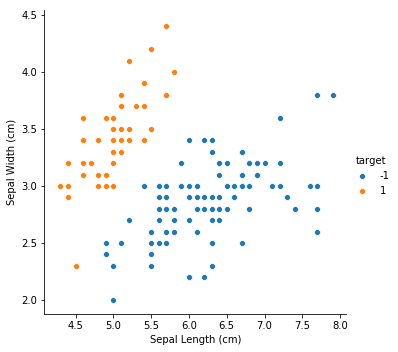

In [5]:
sns.pairplot(x_vars=["Sepal Length (cm)"], y_vars=["Sepal Width (cm)"], data=iris_df, hue="target", height=5)
plt.show()

In [6]:
class LogisticRegression:
    
    def __init__(self, lr=0.01, num_iter=10000, w0=0.5, verbose=True):
        self.lr = lr
        self.num_iter = num_iter
        self.verbose = verbose
        self.w0 = w0
        self.m = y.shape[0]
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def prediction(self, w, Data):
        pred = []
        z = np.dot(Data,w)
        a = self.sigmoid(z)
        
        for i in range(0,len(a)):
            if (a[i] > self.w0): 
                pred.append(1)
            elif (a[i] <= self.w0):
                pred.append(-1)
        return pred

    def fit(self, X, y):
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            val = -np.multiply(y,z)
            f = -np.multiply(y,np.exp(val))/(1+np.exp(val))
            gradient = np.dot(X.T,f.T)
            self.theta -= self.lr * gradient.T
            
            if (self.verbose) and (i % 100) == 0:
                loss = np.sum(np.log(1+np.exp(val)))
                y_pred = self.prediction(self.theta, X)
                print('loss =',round(loss,3),' Training Accuracy',round(accuracy_score(y, y_pred)*100,1))
                
    def get_theha(self):
        return self.theta

In [7]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

loss = 77.632  Training Accuracy 66.1
loss = 5.422  Training Accuracy 99.1
loss = 5.134  Training Accuracy 99.1
loss = 4.923  Training Accuracy 99.1
loss = 4.758  Training Accuracy 99.1
loss = 4.623  Training Accuracy 99.1
loss = 4.509  Training Accuracy 99.1
loss = 4.409  Training Accuracy 99.1
loss = 4.32  Training Accuracy 99.1
loss = 4.24  Training Accuracy 99.1
loss = 4.166  Training Accuracy 99.1
loss = 4.098  Training Accuracy 99.1
loss = 4.033  Training Accuracy 99.1
loss = 3.972  Training Accuracy 99.1
loss = 3.915  Training Accuracy 99.1
loss = 3.859  Training Accuracy 99.1
loss = 3.806  Training Accuracy 99.1
loss = 3.755  Training Accuracy 99.1
loss = 3.706  Training Accuracy 99.1
loss = 3.659  Training Accuracy 99.1
loss = 3.612  Training Accuracy 99.1
loss = 3.568  Training Accuracy 99.1
loss = 3.524  Training Accuracy 99.1
loss = 3.482  Training Accuracy 99.1
loss = 3.44  Training Accuracy 99.1
loss = 3.4  Training Accuracy 99.1
loss = 3.361  Training Accuracy 99.1
loss 

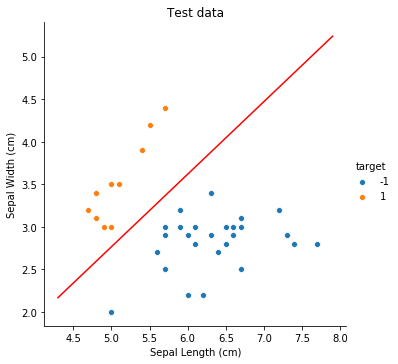

Test accuracy = 1.0


In [9]:
w = logreg.get_theha()

sns.pairplot(x_vars=["Sepal Length (cm)"], y_vars=["Sepal Width (cm)"], data=Data.iloc[train_size:,:],
                                                                                        hue="target", height=5)
domain =  np.linspace(iris_df['Sepal Length (cm)'].min(),iris_df['Sepal Length (cm)'].max(),2)
h_x = -(w[1]/w[2])*domain - (w[0]/w[2])
plt.plot(domain,h_x,color='red')
plt.title('Test data')
plt.show()
print('Test accuracy =', accuracy_score(logreg.prediction(logreg.get_theha(),X_test),y_test))